# STA130 Week 05 Homework
***
#### **Author**: David Daniliuc<br>**Created**: Tue Sept. 8, 2024

> **(Note: ChatBot summaries have been moved to the bottom of the page.)**

### 1. The "first pre-lecture video" (above) describes hypothesis testing as addressing "an idea that can be tested", and the end of the video then discusses what our actual intended purpose in setting up a null hypothesis is. What is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically?  What would you describe is the key "criteria" defining what a good null hypothesis is? And what is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing? Answer these questions with concise explanations in your own words.

The **key factor** in statistically testable ideas is if they can be *quantified* and *measured* which allows for analysis through data. Examples of ideas that cannot be easily quantified and tested include art, philosophy, and consciousness.

A good null hypothesis is *specific*, *testable*, and *falsifiable* because it enables us to evaluate the strength of evidence against the "no effect" scenario.

The difference between the *null hypothesis* ($H_0$) and the *alternative hypothesis* ($H_A$) is that the null hypothesis is assumed true until enough evidence suggests otherwise, while the alternative hypothesis simply states that the null hypothesis is false.

### 2. Towards the end of the "first pre-lecture" video (above) it is stated that, "It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population." In terms of the distinctions between the concepts of $x_i\!$'s, $\bar x$, $\mu$, and $\mu_0$, how would you describe what the sentence above means? Explain this concisely in your own words for a "non-statsitical" audience, defining the technical statistical terminology you use in your answer.

Hypothesis tests are designed to make inferences about population parameters such as the population mean (represented as $\mu$). We use the sample mean (represented as $\bar x$) as evidence to make decisions regarding the null hypothesis ($H_0$), which is a statement about the population parameters (with $\mu_0$ representing the hypothesized population mean under $H_0$). The outcome of a hypothesis test helps determine if our sample provides strong enough evidence to reject $H_0$. Note that the result of a hypothesis test is applied to the entire population, not just the individual data points (represented as $x_i$) within our sample.

### 3. The second "Pre-lecture" video (above) explains that we "imagine a world where the null hypothesis is true" when calculating a p-value? Explain why this is in your own words in a way that makes the most sense to you.

Since we are trying to determine whether to accept or reject the null hypothesis, we must assume that the null hypothesis is true. This assumption provides a baseline reference point as we simulate the *sampling distribution under the null hypothesis*. This distribution illustrates the variability we would anticipate in the test statistic if the null hypothesis is true. If our analysis yields strong evidence against the null hypothesis, we can confidently consider rejecting it because our inferences are made under the assumption that the null hypothesis holds.

If we do not assume the null hypothesis is true while conducting our hypothesis tests, we lack a reference point for evaluating the validity of the null hypothesis. In essence, we must assume the null hypothesis is true to determine its validity.

### 4. The second "Pre-lecture" video (above) suggests that a smaller p-value makes the null hypothesis look more ridiculous. Explain why this is in your own words in a way that makes the most sense to you, clarifying the meaning of any technical statistical terminology you use in your answer.

In the scenario presented in the video, the null hypothesis is that Fido is innocent and the alternative hypothesis is that Fido is guilty. Now, if we assume the null hypothesis (Fido is innocent) and imagine a world where the null hypothesis is true, the probability that someone broke into the apartment just to place the bin lid over Fido's head is very small. This makes the null hypothesis seems so unrealistic that we must reject it.

A more statistical explanation would be if we assume the null hypothesis (Fido is innocent) and simulate a sampling distribution of the test statistic under the null hypothesis (imagine all possible events in the apartment where Fido is innocent and their probabilities of occurring). The lower the p-value, the less likely the observed test statistic (Fido has the bin lid on his head) is to occur if the null hypothesis is true. (i.e. how likely is it for Fido to be innocent and to have the bin lid on his head?)

### 5. Güntürkün (2003) recorded how kissing couples tilt their heads. 80 out of 124 couples, or 64.5% tilted their heads to the right. Simulate a **p-value** using a "50/50 coin-flipping" model for the assumption of the **null hypothesis** $H_0$ that the population of humans don't have left or right head tilt tendencies when kissing, and use the table below to determine the level of evidence we have against $H_0$.

The previous three "Questions 2-4" are highly relevant here. For this question, you need to first (along the lines of "Question 2") understand what the problem context describes to you in terms of something analogous to $x_i\!$'s, $\bar x$, $\mu$, and $\mu_0$. Then you need to (along the lines of "Question 3") figure out how to "imagine a world where the null hypothesis is true" so that you can go about computing a (**simulation** based) p-value calcuation for the null hypothesis under consideration relative to the available data. And finally, you need to make a determination about your potential decision to reject the null hypothesis on the strength of the data at hand on the basis of the "strength of evidence" table given below (which indeed supports the necessary interpretation required to provide an explanation answering "Question 4").

##### 1. Define the problem and the assumptions.
We want to determine which way people tilt their heads to kiss. The observed data is that out of 124 couples, $64.5\%$ tilted their heads to the right when kissing. The observed test statistic is $p= 0.645$, the proportion of couples who titled their heads to the right.

We are assuming the null hypothesis to be $p= 0.5$ (no favoured head tilt) and using a "coin-flipping" model to calculate a **p-value**, which we will use to determine the level of evidence against the null hypothesis.

##### 2. Simulate the kissing model.

In [75]:
import numpy as np

np.random.seed(130)

n_simulations = 10000
n_couples = 124 
observed_proportion = 0.645 
bootstrapped_proportions = np.zeros(n_simulations)

for i in range(n_simulations):
	# Simulate 124 kisses (1 = right tilt)
	simulated_flips = np.random.choice([0,1], size=n_couples, replace=True) 
	# Calculate the proportion of right tilts in this simulation
	proportion_right = np.sum(simulated_flips == 1) / n_couples  
	bootstrapped_proportions[i] = proportion_right

p_value = np.mean(abs(bootstrapped_proportions - 0.5) >= abs(observed_proportion - 0.5))

print("p-value:", p_value)



p-value: 0.0013


#### 3. Evaluate the strength of the evidence.

According to the table given, there is <u>strong evidence</u> against the null hypothesis. Therefore, the observed 64.5% right head tilt is unusual under the assumption of no preference in head tilt.

### 6. Can a smaller p-value definitively prove that the null hypothesis is false? Is it possible to definitively prove that Fido (from the "second pre-lecture video") is innocent using a p-value? Is it possible to difinitively prove that Fido is guilty using a p-value? How low or high does a p-value have to be to definitely prove one or the other? Explain this concisely in your own words.

A smaller p-value does not definitively prove that the null hypothesis is false. P-values are probabilities calculated under the assumption that the null hypothesis is true, and indicate how likely it is to observe a statistic as or more extreme than the observed statistic. Even with a small p-value, there's always a chance that the observed statistic could have occurred by random chance. In essence, p-values offer *evidence*, **not proof**, of a hypothesis and can be used to evaluate the strength of the evidence against the null hypothesis.

If the p-value is 0, it suggests that the observed data would be impossible to obtain if the null hypothesis were true. Conversely, if the p-value is 1, it suggests the observed data perfectly aligns with the null hypothesis. Both extremes would seemingly validate the null hypothesis. However, these values often indicate that the model or assumptions don't fully capture the population/data and are extremely unlikely in real-world situations.


### 7. In the second half of the "first pre-lecture video" the concept of a "one sided" (or "one tailed") test is introduced in contrast to a "two sided" (or "two tailed") test. Work with a ChatBot to adjust the code from "Demo II of  the Week 5 TUT" (which revisits the "Vaccine Data Analysis Assignment" from Week 04 HW "Question 8") in order to compute a p-value for a "one sided" (or "one tailed") hypothesis test rather than the "two sided" (or "two tailed") version it provides. Describe (perhaps with the help of your ChatBot) what changed in the code; how this changes the interpretation of the hypothesis test; and whether or not we should indeed expect the p-value to be smaller in the "one tailed" versus "two tailed" analysis. <br>

The change in the code is that now we are only looking at the simulated test statistics (bootstrapped means) that are greater than or equal to the observed test statistic (sample mean of positive health changes). As such, the calculation is much simpler since we don't need to consider the other side/tail. Also, we are now only looking for evidence of a positive health change. Therefore, the one-sided p-value should be smaller since we are filtering for a smaller set of test statistics.

Below is the changed code:

In [76]:
import pandas as pd
import numpy as np

# Sample patient data
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate Health Score Change
patient_data['HealthScoreChange'] = patient_data['FinalHealthScore'] - patient_data['InitialHealthScore']

population_parameter_value_under_H0 = 0.5

np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000  # experiment with this... what does this do?
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

for i in range(number_of_simulations):
    random_improvement = np.random.choice([0, 1], size=len(patient_data), replace=True)  # <<< `replace=True` ^^^
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

# Calculate the p-value
observed_test_statistic = (patient_data.HealthScoreChange > 0).mean()
simulated_test_statistics = IncreaseProportionSimulations_underH0random

# **Change made here: Calculate one-sided comparison**
# We are interested in whether the observed statistic is greater than or equal to the hypothesized parameter value.
SimTestStats_greater_than_ObsTestStat = simulated_test_statistics >= observed_test_statistic

# Calculate one-sided p-value
p_value = SimTestStats_greater_than_ObsTestStat.sum() / number_of_simulations

print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated test statistics (under H0)\n",
      'that are greater than or equal to the observed test statistic: ',
      SimTestStats_greater_than_ObsTestStat.sum(), "\n\n",
      'One-sided p-value\n(= simulations "greater than or equal to" / total simulations): ', p_value, sep="")


Number of Simulations: 10000

Number of simulated test statistics (under H0)
that are greater than or equal to the observed test statistic: 565

One-sided p-value
(= simulations "greater than or equal to" / total simulations): 0.0565


### 8. Complete the following assignment.

#### Fisher's Tea Experiment with STA130 Students

---

#### Problem Introduction
- **Context:** Determine whether STA130 students can correctly identify the order of milk and tea pouring.
- **Population:** All of the students in STA130.
- **Hypotheses:**
  - **Null Hypothesis** ($H_0$): $p = 0.5$ (students are guessing).
  - **Alternative Hypothesis** ($H_1$): $p > 0.5$ (students can distinguish order).
- **Significance Level:** $\alpha=0.05$

---

#### Quantitative Analysis

##### Methodology
1. **Observed Data:**
   - Correct identifications ($x_i$): $49$
   - Total students: $n=80$
   - Observed proportion: $ \hat{p} = \frac{49}{80} = 0.6125$

2. **Bootstrapping Procedure:**
   - Resample the observed data (with replacement) to create multiple samples.
   - For each resample, calculate the proportion of correct identifications.
   - Repeat the process (e.g., 10,000 times).

3. **Calculate p-value:**
   - Count the number of bootstrapped proportions greater than or equal to the observed proportion.
   - Divide by the total number of resamples to obtain the p-value.

---

#### Calculation

Bootstrap Proportions Mean: 0.4998
Standard Deviation of Bootstrap Proportions Mean: 0.0554
Standard Error of the Bootstrap Proportions Mean: 0.0062
P-Value: 0.0284


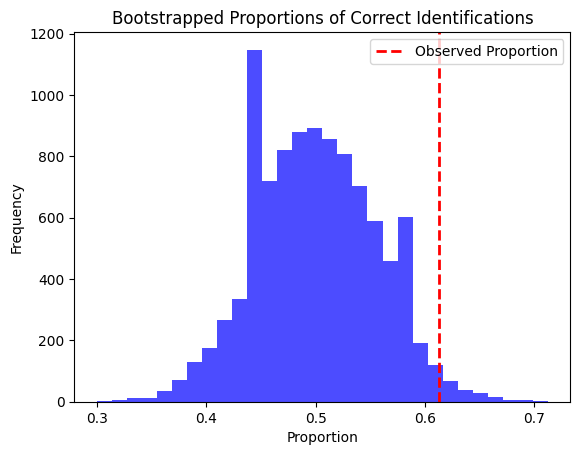

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(130)

# Data
correct_identifications = 49
total_students = 80
observed_proportion = correct_identifications / total_students

# Bootstrapping
num_of_simulations = 10000
bootstrapped_proportions = np.zeros(num_of_simulations)

for i in range(num_of_simulations):
    # Assuming that students are guessing (assuming the null hypothesis is true)
	resample = np.random.randint(0, 2, size=total_students)

	# Calculate the proportion of correct identifications in the resample
	bootstrapped_proportions[i] = resample.mean()

# Calculate the p-value
p_value = np.sum(bootstrapped_proportions >= observed_proportion) / num_of_simulations

bootstrapped_proportions_mean = bootstrapped_proportions.mean()
bootstrapped_proportions_std = bootstrapped_proportions.std()
bootstrapped_proportions_ste = bootstrapped_proportions_std / np.sqrt(total_students)

# Output results
print(f"Bootstrap Proportions Mean: {bootstrapped_proportions_mean:.4f}")
print(f"Standard Deviation of Bootstrap Proportions Mean: {bootstrapped_proportions_std:.4f}")
print(f"Standard Error of the Bootstrap Proportions Mean: {bootstrapped_proportions_ste:.4f}")
print(f"P-Value: {p_value:.4f}")

# Visualization of bootstrapped proportions
plt.hist(bootstrapped_proportions, bins=30, alpha=0.7, color='blue')
plt.axvline(observed_proportion, color='red', linestyle='dashed', linewidth=2, label='Observed Proportion')
plt.title('Bootstrapped Proportions of Correct Identifications')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.legend()
plt.show()


---

#### Findings and Discussion
- **P-Value:** $0.0267$
- **Significance Level:** $\alpha=0.05$
- **Conclusion:**
	- Since the p-value is less than the significance level, we reject the null hypothesis. This suggests that the students' ability to correctly identify whether the milk or tea was poured first is not due to random guessing. There is evidence to support the alternative hypothesis, that the students may have a genuine ability to distinguish the pouring order.

### 9. Have you reviewed the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

This week, I started to use the STA130 ChatBot for the homework and to study difficult topics such as hypothesis testing and p-values. The STA130 ChatBot was extremely helpful compared to ChatGPT, and gave meaningful explanations and examples.

***
### ChatBot Homework Session Summaries
> **Question 1:**
> 
> The conversation started with a request to simplify an explanation about null hypotheses. The simplified response explained that statistically testable ideas are quantifiable and measurable, enabling analysis with data. A good null hypothesis should be specific, testable, and falsifiable. This helps to evaluate the evidence against a scenario where there's "no effect". The conversation clarified the difference between a null hypothesis ($H_0$) and an alternative hypothesis ($H_A$): $H_0$ is presumed true until sufficient evidence suggests otherwise, while $H_A$ simply asserts that $H_0$ is not true.
The discussion then emphasized the importance of considering the average effect on the population. When testing a drug's effect on blood pressure, for example, the null hypothesis should focus on whether the average change in blood pressure for the population taking the drug is different from zero, rather than proving the drug has no effect on anyone.
The conversation stressed the difference between population parameters and sample statistics. Population parameters describe the whole population (like the average change in blood pressure for everyone who might take the drug), while sample statistics are calculated from a subset of that population and are subject to variability. Hypothesis testing uses sample statistics to draw conclusions about population parameters. The aim is to determine if the observed sample statistic provides strong enough evidence to reject the null hypothesis about the population parameter.
> 
> **Question 2:**
> 
> The conversation began by trying to simplify an explanation about the sentence from the video, "It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population." This explanation used the example of height of students at the University of Toronto to illustrate the difference between individual observations from a sample ($x_i$'s), the sample mean ($\bar{x}$), the population mean ($\mu$ ), and the hypothesized population mean under the null hypothesis ($\mu_0$). The conversation then attempted to further simplify this explanation, aiming for a concise 3-4 sentence summary.
Next, the conversation sought clarification about the definition of $x_i$'s, $\bar{x}$, $\mu$, and $\mu_0$, requesting definitions without examples and specifying whether each term relates to the sample or population. After providing the definitions, the conversation confirmed the correctness of the following statement about the sentence from the video:
Hypothesis tests aim to make inferences about population parameters such as the population mean (represented as $\mu$). We use the sample mean (represented as $\bar{x}$) as evidence to make decisions about the null hypothesis ($H_0$), which is a statement about the population parameters ($\mu_0$ represents the hypothesized population mean under $H_0$). The outcome of a hypothesis test helps us decide if our sample provides strong enough evidence to reject $H_0$. Importantly, the result of a hypothesis test is applied to the whole population, not just the specific individuals within our sample.
Finally, the conversation confirmed the accuracy of the explanation and suggested adding a definition of the p-value for further clarity.
> 
> **Question 3:**
> 
> When calculating a p-value, we "imagine a world where the null hypothesis is true" because the p-value is defined as the probability of observing a statistic as or more extreme than the observed statistic if the null hypothesis is true. This means we need to consider what the distribution of the test statistic would look like if the null hypothesis were actually true.
To do this, we simulate the sampling distribution of the statistic under the null hypothesis. As discussed in our previous conversation, the null hypothesis is a statement about the population parameter we're interested in. For example, if we are testing whether a vaccine has an effect on patient health, our null hypothesis might be that the vaccine has no effect on average ($\mu=0$). This implies that any observed improvements or reductions in health scores are simply due to random chance.
To "imagine" this world where the null hypothesis is true, we simulate a large number of samples under the assumption that the null hypothesis is correct. For our vaccine example, we might simulate the distribution of the proportion of patients who improve after receiving the vaccine, assuming that the vaccine has no effect and the improvements are purely random. This simulated distribution represents the variability we would expect to see in the test statistic if the null hypothesis were true.
We then compare the observed statistic from our actual sample to this simulated distribution. The p-value is calculated as the proportion of simulated statistics that are as or more extreme than the observed statistic. If the p-value is small, it means that our observed statistic is unlikely to have occurred if the null hypothesis were true. This provides evidence against the null hypothesis and suggests that the observed effect (e.g., improvement in patient health after taking the vaccine) is not simply due to random chance.
>
> **Question 4:**
> 
> A smaller p-value suggests that the null hypothesis is less likely to be true. This is because the p-value represents the probability of observing a test statistic as extreme as the one obtained from the sample data, if the null hypothesis were actually true.
As discussed in our previous conversation, to calculate a p-value, we first need to simulate the sampling distribution of the test statistic under the null hypothesis. This distribution shows us the range of values we would expect to see for the test statistic (a numerical summary of our sample data) if the null hypothesis accurately described the population.
> Here's how the logic works:
> - Imagine the null hypothesis is true: We start by assuming that the null hypothesis is indeed correct.
> - Consider the sampling distribution: We then generate the sampling distribution of the test statistic, which represents the variability we would expect to observe in the test statistic if the null hypothesis were true.
> - Compare the observed test statistic: We then compare our actual observed test statistic (calculated from our sample data) to this simulated distribution.
> - Determine the p-value: The p-value is the proportion of simulated test statistics that are as or more extreme than our observed test statistic.
Now, if the p-value is small:
> - Improbable outcome: It means that our observed test statistic is quite unusual and would be very unlikely to occur if the null hypothesis were true.
> - Evidence against the null: This suggests that our sample data is not consistent with the null hypothesis, providing evidence against it. The smaller the p-value, the more improbable our observed data becomes under the assumption that the null hypothesis is true, making the null hypothesis look increasingly "suspicious" or "ridiculous."
> 
> For example:
Imagine we're testing a new drug, and our null hypothesis is that the drug has no effect on patient health. If our analysis yields a very small p-value, it suggests that the observed improvement in patient health after taking the drug is highly unlikely to have occurred simply by chance. This makes the null hypothesis (that the drug has no effect) seem less plausible.
Key Takeaway:
The p-value does not prove that the null hypothesis is false. It simply quantifies the strength of evidence against the null hypothesis. A small p-value provides stronger evidence against the null hypothesis, leading us to question its validity and consider alternative explanations for our observations.
>
> **Question 7:**
> 
> You asked about adapting Week 5 Tutorial Demo II, which covers the vaccine data analysis, to calculate a p-value for a one-sided hypothesis test. Let's break down the necessary modifications and how they affect the interpretation of the results.
Understanding Demo II and Hypothesis Testing
Demo II in the Week 5 Tutorial introduces the concept of hypothesis testing using a simulation approach. It aims to evaluate a null hypothesis about a population parameter based on a sample statistic.
Hypothesis testing is a statistical method that uses sample data to draw inferences about a population. The process involves formulating two hypotheses:
> - Null hypothesis (H0): A statement of no effect or no difference.
> - Alternative hypothesis (HA): A statement that contradicts the null hypothesis, suggesting an effect or difference.
> 
> The goal is to determine whether the observed data provides enough evidence to reject the null hypothesis in favor of the alternative hypothesis.
One-Sided vs. Two-Sided Tests
Demo II originally uses a two-sided hypothesis test, which considers deviations from the null hypothesis in both directions. In the context of the vaccine data, a two-sided test would look for any difference in health scores, whether positive or negative, after receiving the vaccine.
However, your query focuses on a one-sided hypothesis test. This type of test seeks evidence for an effect in a specific direction. For example, in the vaccine case, you might only be interested in whether the vaccine leads to an improvement in health scores.
Modifying the Code
The core modification lies in how you define "as or more extreme" when calculating the p-value.
In a two-sided test, you would compare the absolute differences between the simulated test statistics and the hypothesized parameter value.
In a one-sided test, you focus only on the direction of interest. For the vaccine example where you are looking for improvement, you would only consider simulated proportions of positive health changes that are greater than or equal to the observed proportion in the actual sample data.
As we discussed in our conversation history, this change in focus means you only need to consider one tail of the sampling distribution when calculating the p-value. The code becomes simpler, and the resulting one-sided p-value is typically smaller than the two-sided p-value.
Interpretation of Results
A small one-sided p-value provides strong evidence against the null hypothesis in the specific direction of interest. For the vaccine example, this would mean that the observed improvement in health scores is unlikely due to random chance and provides evidence that the vaccine might indeed be effective.
A large one-sided p-value, however, does not prove the null hypothesis. Instead, it suggests that the observed data does not provide enough evidence to reject the null hypothesis, meaning the observed improvement might be due to chance alone.
Relating to Confidence Intervals
As noted in the sources, hypothesis testing and confidence intervals are interconnected. A two-sided hypothesis test at a given significance level is equivalent to checking if the hypothesized parameter value falls within a corresponding confidence interval.
In a one-sided test, you can think of it as constructing a one-sided confidence interval. For instance, if you are testing for improvement, you are essentially looking at the lower bound of the confidence interval. If the hypothesized value falls below this lower bound, you reject the null hypothesis, suggesting a positive effect.